In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Structured data


## Data as variables

In [2]:
# variables
customer1_age = 38
customer1_height = 178
customer1_loan = 34.23
customer1_name = 'Zajac'

> Why don't we use variables for data analysis?

In Python, regardless of the type of data being analyzed and processed, we can collect data and represent it as a form of `list`.

In [3]:
# python lists - what we can put on list ?
customer = []
print(customer)

[]


In [4]:
# different types in one object
type(customer)

list

> Why lists aren't the best place to store data?

Let's take two numerical lists."

In [5]:
# two numerical lists
a = [1,2,3]
b = [4,5,6]

Typical operations on lists in data analysis

In [6]:
# add lists
print(f"a+b: {a+b}")
# we can use .format also 
print("a+b: {}".format(a+b))

a+b: [1, 2, 3, 4, 5, 6]
a+b: [1, 2, 3, 4, 5, 6]


In [7]:
# multiplication
try:
    print(a*b)
except TypeError:
    print("no-defined operation")

no-defined operation


In [8]:
import numpy as np
aa = np.array(a)
bb = np.array(b)

print(aa,bb)

[1 2 3] [4 5 6]


In [9]:
print(f"aa+bb: {aa+bb}")
# add - working
try:
    print("="*50)
    print(aa*bb)
    print("aa*bb - is this correct ?")
    print(np.dot(aa,bb))
    print("np.dot - is this correct ?")
except TypeError:
    print("no-defined operation")
# multiplication

aa+bb: [5 7 9]
[ 4 10 18]
aa*bb - is this correct ?
32
np.dot - is this correct ?


In [10]:
# array properties
x = np.array(range(4))
print(x)
x.shape

[0 1 2 3]


(4,)

In [11]:
A = np.array([range(4),range(4)])
# transposition  row i -> column j, column j -> row i 
A.T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]])

In [12]:
# 0-dim object
scalar = np.array(5)
print(f"scalar object dim: {scalar.ndim}")
# 1-dim object
vector_1d = np.array([3, 5, 7])
print(f"vector object dim: {vector_1d.ndim}")
# 2 rows for 3 features
matrix_2d = np.array([[1,2,3],[3,4,5]])
print(f"matrix object dim: {matrix_2d.ndim}")

scalar object dim: 0
vector object dim: 1
matrix object dim: 2


<img src="tensory.png">


[Sebastian Raschka Course](https://sebastianraschka.com/blog/2020/numpy-intro.html)


## PyTorch 

[PyTorch](https://pytorch.org) is an open-source Python-based deep learning library. 
PyTorch has been the most widely used deep learning library for research since 2019 by a wide margin. In short, for many practitioners and researchers, PyTorch offers just the right balance between usability and features.

1. PyTorch is a tensor library that extends the concept of array-oriented programming library NumPy with the additional feature of accelerated computation on GPUs, thus providing a seamless switch between CPUs and GPUs.

2. PyTorch is an automatic differentiation engine, also known as autograd, which enables the automatic computation of gradients for tensor operations, simplifying backpropagation and model optimization.

3. PyTorch is a deep learning library, meaning that it offers modular, flexible, and efficient building blocks (including pre-trained models, loss functions, and optimizers) for designing and training a wide range of deep learning models, catering to both researchers and developers.


In [13]:
#pip install torch


In [14]:
import torch


In [15]:
torch.cuda.is_available()

False

In [16]:
tensor0d = torch.tensor(1) 
tensor1d = torch.tensor([1, 2, 3])
tensor2d = torch.tensor([[1, 2, 2], [3, 4, 5]])
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [17]:
print(tensor1d.dtype)

torch.int64


In [18]:
torch.tensor([1.0, 2.0, 3.0]).dtype

torch.float32

In [19]:
tensor2d

tensor([[1, 2, 2],
        [3, 4, 5]])

In [20]:
tensor2d.shape

torch.Size([2, 3])

In [21]:
print(tensor2d.reshape(3, 2))

tensor([[1, 2],
        [2, 3],
        [4, 5]])


In [22]:
print(tensor2d.T)

tensor([[1, 3],
        [2, 4],
        [2, 5]])


In [23]:
print(tensor2d.matmul(tensor2d.T))

tensor([[ 9, 21],
        [21, 50]])


In [24]:
print(tensor2d @ tensor2d.T)

tensor([[ 9, 21],
        [21, 50]])


more info on [pytorch](https://pytorch.org/docs/stable/tensors.html)

## Data Modeling
Let's take one variable (`xs`) and one target variable (`ys` - target).
```python
xs = np.array([-1,0,1,2,3,4])
ys = np.array([-3,-1,1,3,5,7])
```

What kind of model we can use? 

In [25]:
# Regresja liniowa 

import numpy as np
from sklearn.linear_model import LinearRegression

xs = np.array([-1,0,1,2,3,4])
# a raczej 
xs = xs.reshape(-1, 1)

ys = np.array([-3, -1, 1, 3, 5, 7])

reg = LinearRegression()
model = reg.fit(xs,ys)

print(f"solution: x1={model.coef_[0]}, x0={reg.intercept_}")

model.predict(np.array([[1],[5]]))

solution: x1=1.9999999999999996, x0=-0.9999999999999991


array([1., 9.])

The simple code fully accomplishes our task of finding a linear regression model.

What can we use such a generated model for?

To make use of it, we need to export it to a file.

In [26]:
# save model
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(model, picklefile)

Now we can import it (for example, on GitHub) and utilize it in other projects.

In [27]:
# load model
with open('model.pkl',"rb") as picklefile:
    mreg = pickle.load(picklefile)

But !!! remember about Python Env

In [28]:
mreg.predict(xs)

array([-3., -1.,  1.,  3.,  5.,  7.])

In [29]:
#pip install tensorflow

## Neural Networks

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
import tensorflow as tf

We can also look at this problem from a different perspective. 
Neural networks are also capable of solving regression problems

In [32]:
layer_0 = Dense(units=1, input_shape=[1])

model = Sequential([layer_0])

# compiling and fits
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 234ms/step - loss: 15.2652
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 12.2516
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 9.8756
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 8.0015
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 6.5223
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 5.3538
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 4.4299
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 3.6986
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 3.1189
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6585


In [33]:
print(f"{layer_0.get_weights()}")

[array([[1.1169566]], dtype=float32), array([0.19146262], dtype=float32)]


Other ways of acquiring data

1. Ready-made sources in Python libraries.
2. Data from external files (e.g., CSV, JSON, TXT) from a local disk or the internet.
3. Data from databases (e.g., MySQL, PostgreSQL, MongoDB).
4. Data generated artificially for a chosen modeling problem.
5. Data streams.

In [34]:
from sklearn.datasets import load_iris

iris = load_iris()

In [35]:
# find all keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
# print description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
import pandas as pd
import numpy as np

# create DataFrame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [38]:
# show last
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [39]:
# show info about NaN values and a type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [40]:
# statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [41]:
# new features
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [42]:
# remove features (columns) 
df = df.drop(columns=['target'])
# filtering first 100 rows and 4'th column

<AxesSubplot: xlabel='measurement', ylabel='value'>

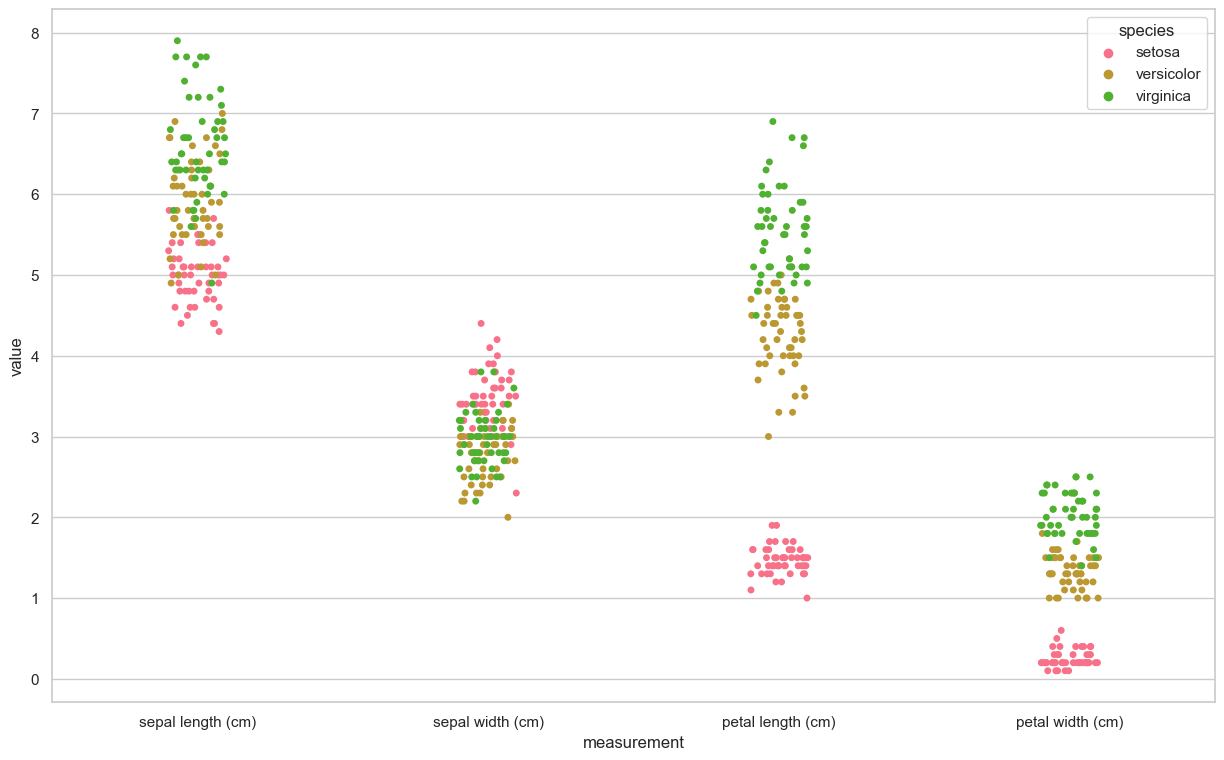

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl")

iris_melt = pd.melt(df, "species", var_name="measurement")
f, ax = plt.subplots(1, figsize=(15,9))
sns.stripplot(x="measurement", y="value", hue="species", data=iris_melt, jitter=True, edgecolor="white", ax=ax)

In [44]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[0:100,4].values

In [45]:
y = np.where(y == 'setosa',-1,1)

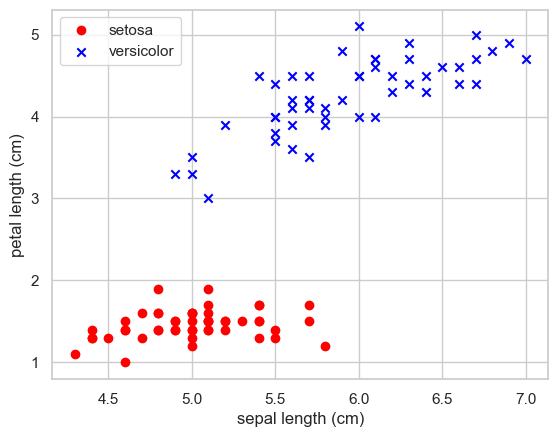

In [46]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

For this type of linearly separable data, use logistic regression model or neural network.

In [47]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5],[4,5.5]])
y_pred

array([-1,  1])

## Data Storage and Connection to a Simple SQL Database

In [48]:
IRIS_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(IRIS_PATH, names=col_names)

In [49]:
# save to sqlite
import sqlite3
# generate database
conn = sqlite3.connect("iris.db")
# pandas to_sql

try:
    df.to_sql("iris", conn, index=False)
except:
    print("tabela już istnieje")

tabela już istnieje


In [50]:
# sql to pandas
result = pd.read_sql("SELECT * FROM iris WHERE sepal_length > 5", conn)

In [51]:
result.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.4,3.9,1.7,0.4,Iris-setosa
2,5.4,3.7,1.5,0.2,Iris-setosa


In [52]:
# Artificial data
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10**4,
n_features=20, n_informative=2, n_redundant=2)


from sklearn.ensemble import RandomForestClassifier


# train test split by heand
train_samples = 7000 # 70% 

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rfc.predict(X_train[0].reshape(1, -1))

array([0])

## ZADANIA

1. Load data from the `train.csv` file and put it into the panda's data frame

In [54]:
## YOUR CODE HERE
df = pd.read_csv("C:/Users/Bahram/Downloads/train_m.csv")


2. Show number of row and number of columns 

In [55]:
## YOUR CODE HERE
# Show the number of rows and columns in the DataFrame
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 891
Number of columns: 12


Perform missing data handling:

1. Option 1 - remove rows containing missing data (`dropna()`)
2. Option 2 - remove columns containing missing data (`drop()`)
3. Option 3 - perform imputation using mean values (`fillna()`)

Which columns did you choose for each option and why?

In [56]:
# Count missing values in each row
missing_values_in_rows = df.isnull().sum(axis=1)
print("Missing values in each row:")
print(missing_values_in_rows)


Missing values in each row:
0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [57]:
# Count missing values in each column
missing_values_in_columns = df.isnull().sum()
print("Missing values in each column:")
print(missing_values_in_columns)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [58]:
# Removing all rows with missing values
option1_df = df.dropna()

In [59]:
#Removing entire columns with many missing values can help us to simplify the dataset and 
#potentially improve the performance. 
#"Cabin" column has a large number of missing values (687 out of 891),
#Instead of filling these missing values, removing whole column would be better. 
option2_df = df.drop(columns=['Cabin'])

In [60]:
####  Age column has missing values (177 out of 891).
#'Age' coulmn does not have missing values as much as 'Cabin' column and
#also 'Age' column has significance importance for our dataset.
#That's why I filled these missing values using mean imputation
mean_age = df['Age'].mean()
option3_df = df.fillna({'Age': mean_age})

4. Using the `nunique()` method, remove columns that are not suitable for modeling.

In [61]:
# Removing columns with only one unique value from option3_df
suitable_cols_option3_df = option3_df.loc[:, option3_df.nunique() > 1]


5. Convert categorical variables using LabelEncoder into numerical form.

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Converting categorical variables into numerical form
categorical_cols = option3_df.select_dtypes(include='object').columns
option3_df[categorical_cols] = option3_df[categorical_cols].apply(lambda col: le.fit_transform(col))



6. Utilize `MinMaxScaler` to transform floating-point data to a common scale

In [63]:
## YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Transforming floating-point data to a common scale
scaled_data = scaler.fit_transform(option3_df)

print(scaled_data)


[[0.         0.         1.         ... 0.01415106 1.         0.66666667]
 [0.0011236  1.         0.         ... 0.13913574 0.55102041 0.        ]
 [0.00224719 1.         1.         ... 0.01546857 1.         0.66666667]
 ...
 [0.99775281 0.         1.         ... 0.04577135 1.         0.66666667]
 [0.9988764  1.         0.         ... 0.0585561  0.40816327 0.        ]
 [1.         0.         1.         ... 0.01512699 1.         0.33333333]]


7. Split the data into training set (80%) and test set (20%)

In [64]:
from sklearn.model_selection import train_test_split

X = option3_df.drop('Survived', axis=1)
y = option3_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


8. Using mapping, you can classify each passenger. The `run()` function requires providing a classifier for a single case.
   - Write a classifier that assigns a value of 0 or 1 randomly (you can use the `random.randint(0,1)` function).
   - Execute the `evaluate()` function and check how well the random classifier performs."

In [65]:
classify = ...

In [66]:
import random

def classify():
    return random.randint(0,1)

def run(f_classify, x):
    return list(map(f_classify, x))

def evaluate(predictions, actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions, actual))
    ))
    return f"{len(correct)} correct answers from {len(actual)}. Accuracy ({len(correct)/len(actual)*100:.0f}%)"

In [68]:
print(evaluate(run(lambda x: classify(), X_train.values), y_train.values))

348 correct answers from 712. Accuracy (49%)
